# Equi Boots Graphical Notebook

## Library Imports

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    brier_score_loss,
)
from sklearn.calibration import calibration_curve
import numpy as np
import pandas as pd
import os
import sys

# Add path to import EquiBoots
script_path = os.path.abspath("../py_scripts")
print("Appending path:", script_path)
sys.path.append(script_path)

from plots import eq_plot_roc_auc, eq_plot_precision_recall, eq_calibration_curve_plot
from EquiBoots import EquiBoots

Appending path: /home/lshpaner/Documents/GitHub_Repositories/equi_boots/py_scripts


## Main

In [2]:
# Generate synthetic test data
y_prob = np.random.rand(1000)
y_pred = y_prob > 0.5
y_true = np.random.randint(0, 2, 1000)

race = np.random.choice(["white", "black", "asian", "hispanic"], 1000).reshape(-1, 1)
sex = np.random.choice(["M", "F"], 1000).reshape(-1, 1)

fairness_df = pd.DataFrame(
    data=np.concatenate((race, sex), axis=1), columns=["race", "sex"]
)

# Initialize and process groups
eq = EquiBoots(
    y_true=y_true,
    y_prob=y_prob,
    y_pred=y_pred,
    fairness_df=fairness_df,
    fairness_vars=["race", "sex"],
)
eq.grouper(groupings_vars=["race", "sex"])
sliced_data = eq.slicer("race")

Groups created


## ROC AUC by Group (ex. Race)

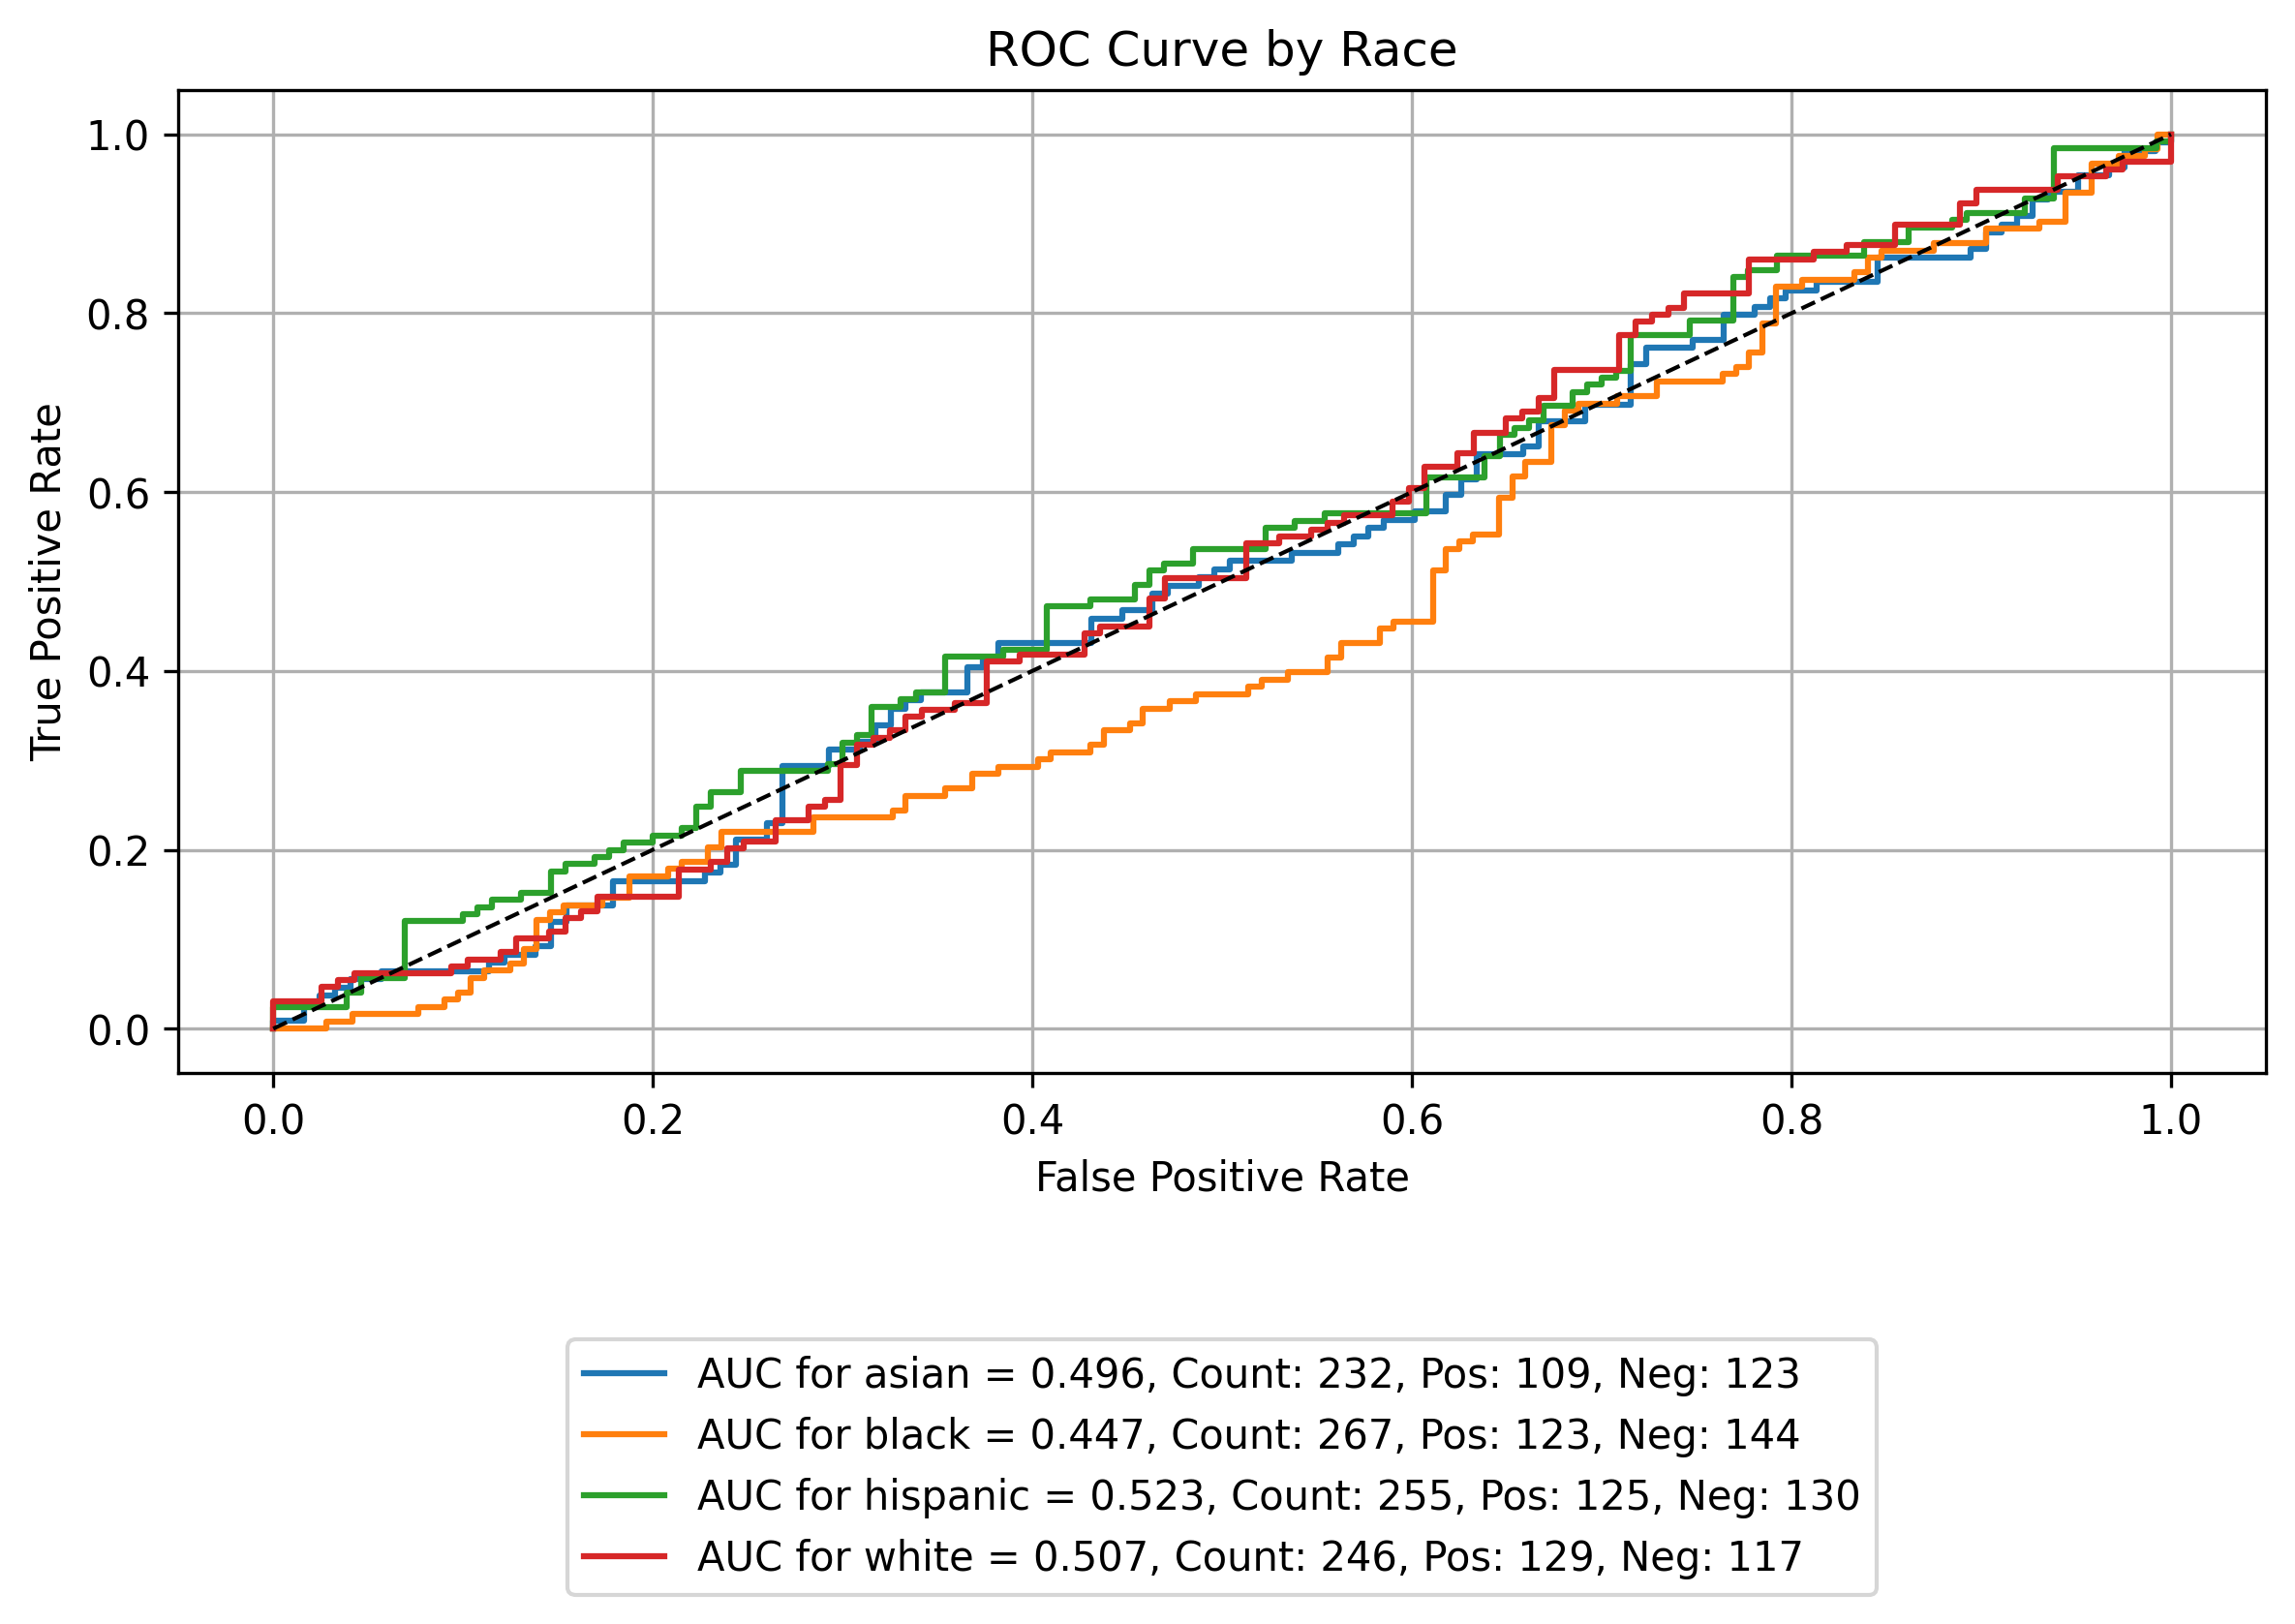

In [7]:
# ROC plot
fig1 = eq_plot_roc_auc(
    data=sliced_data,
    title="ROC Curve by Race",
    # tick_fontsize=8,
    decimal_places=3,
    # figsize=(5, 5),
)
fig1.show()

## Precision-Recall Curves

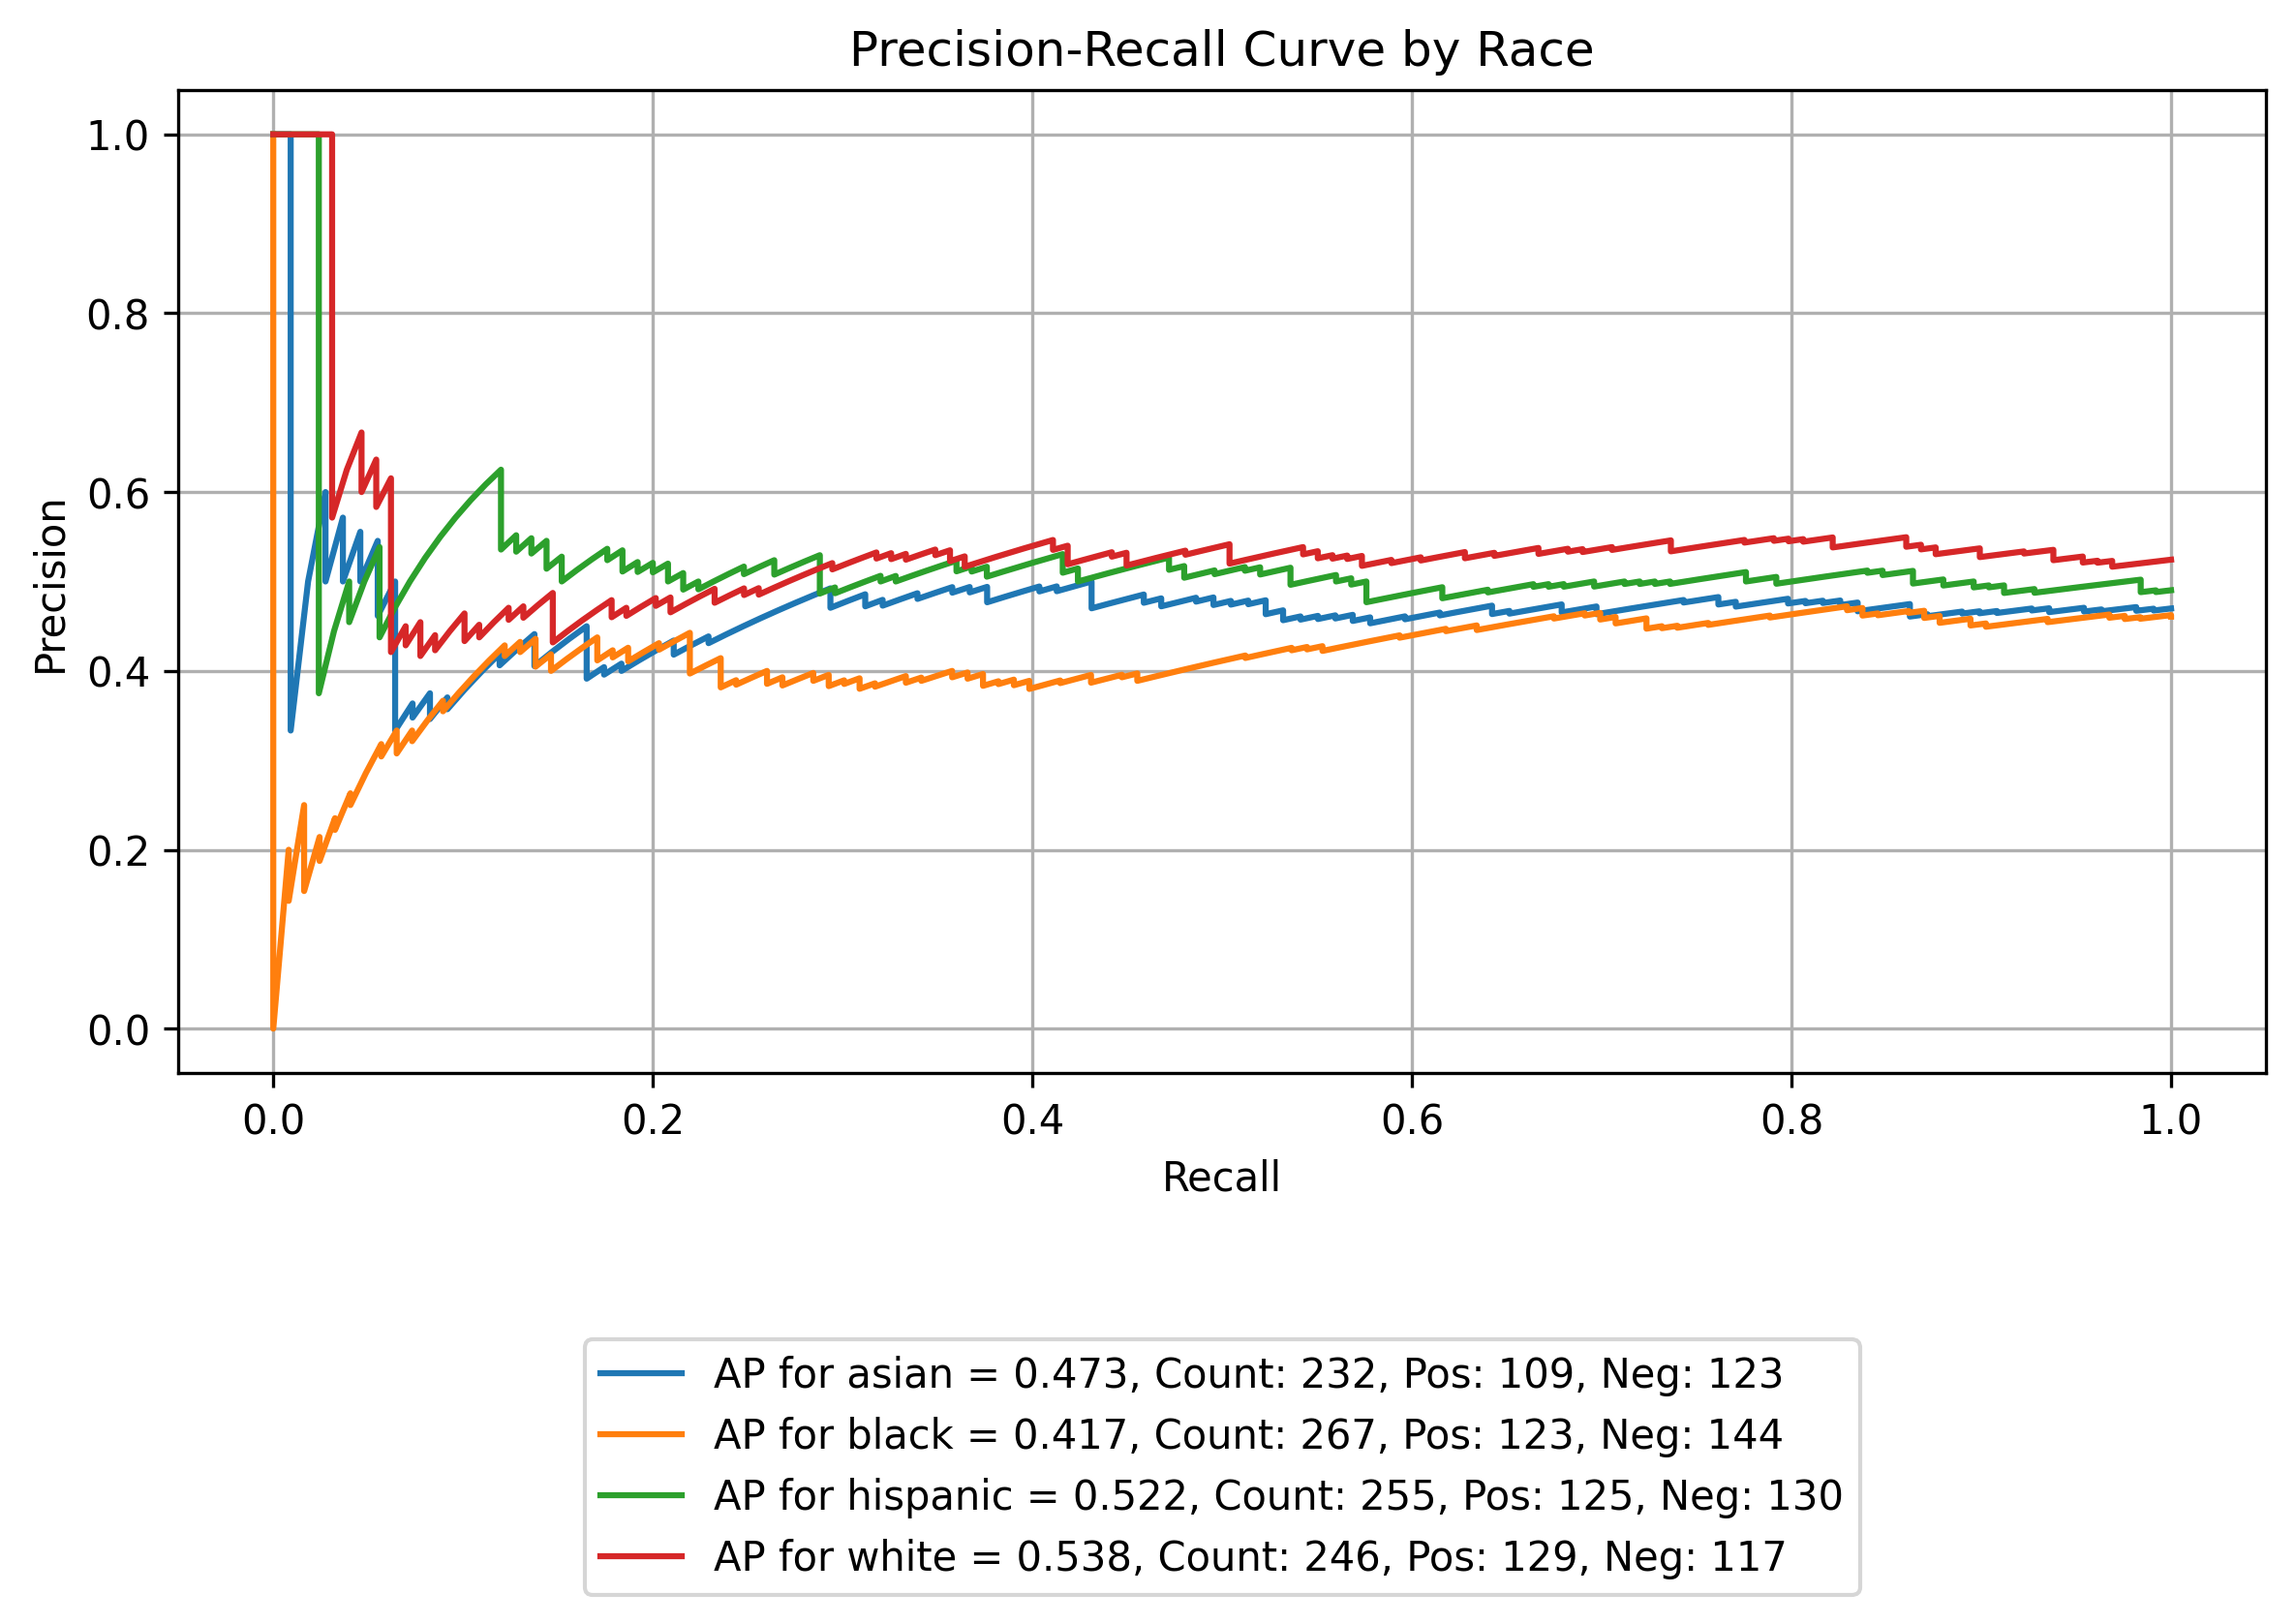

In [8]:
# Precision-Recall plot
fig2 = eq_plot_precision_recall(
    data=sliced_data,
    title="Precision-Recall Curve by Race",
    # tick_fontsize=8,
    decimal_places=3,
)
fig2.show()

## Calibration Plot

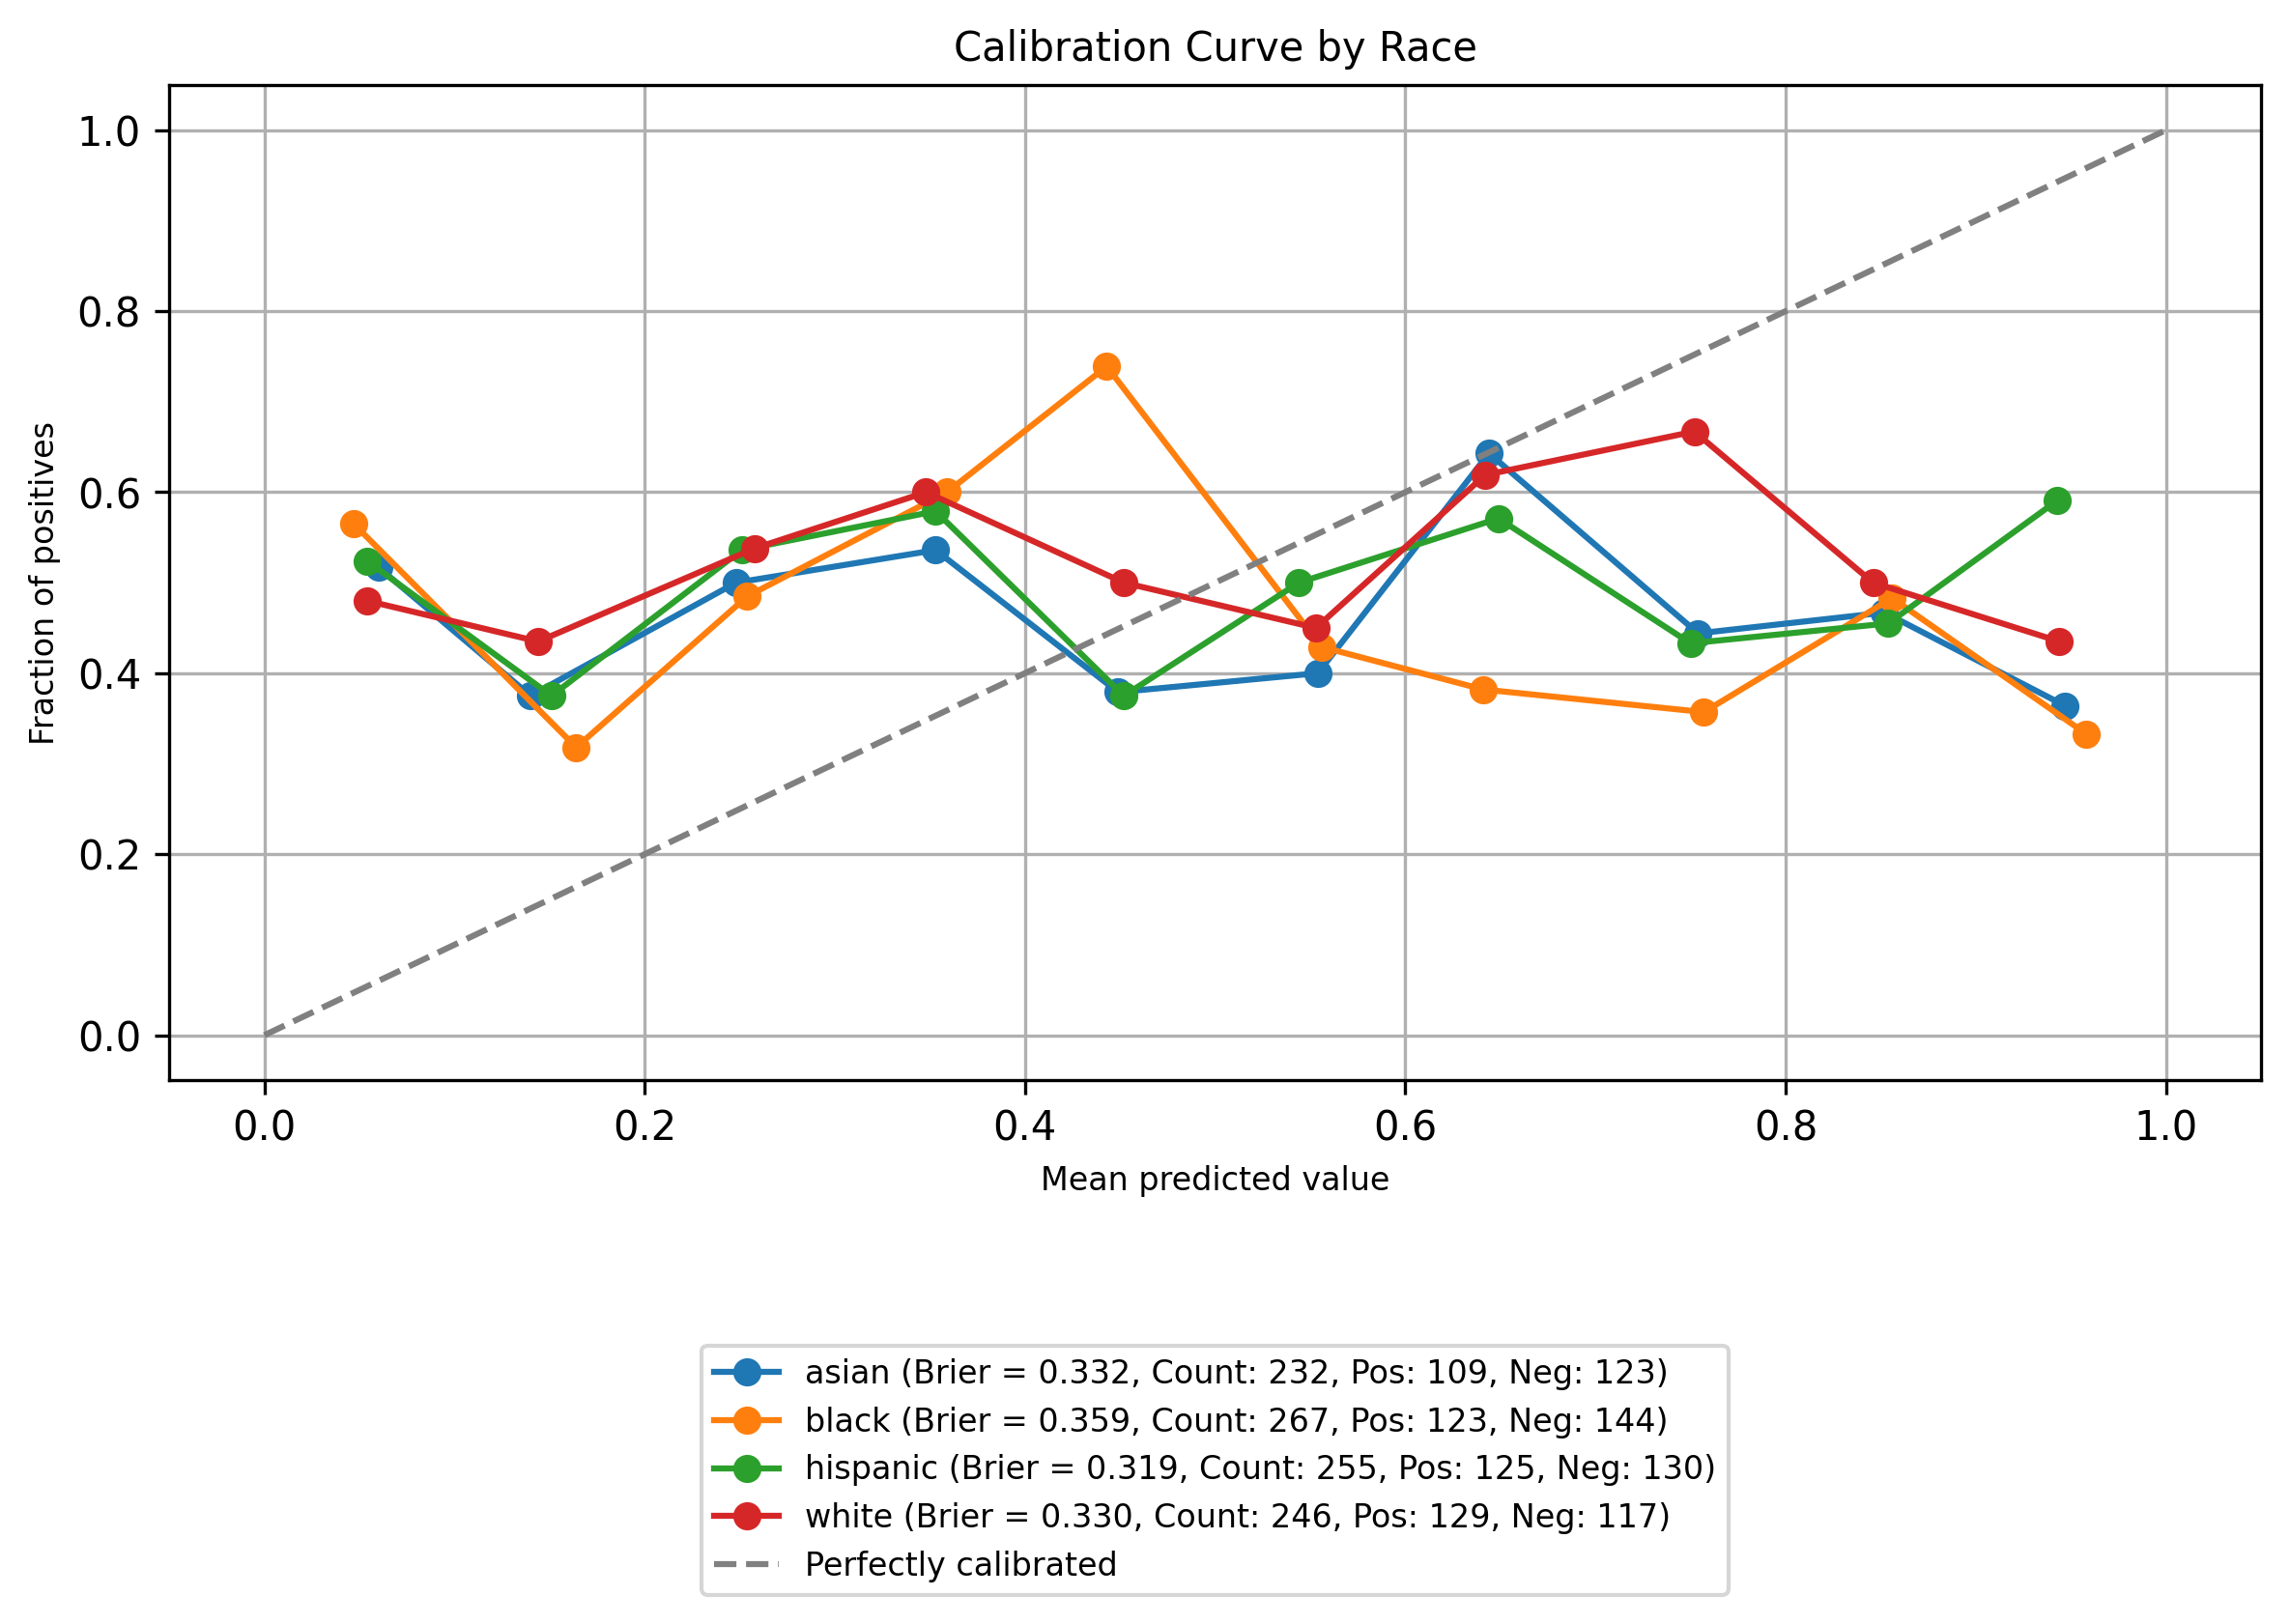

In [5]:
# Calibration plot
fig3 = eq_calibration_curve_plot(
    data=sliced_data,
    n_bins=10,
    title="Calibration Curve by Race",
    tick_fontsize=8,
    decimal_places=3,
)
fig3.show()